Chapitre 5 : corrigé des exercices I, V, VII et VIII
====================================================

Groupe 1.1. - TD sur les éléments finis - 16 janvier 2026.

# Exercice I

Soit $f\in L^{2}(0,1)$.

On considère

$$ (5.1)\quad\left\{
    \begin{array}{ll}
       - \displaystyle u^{\prime\prime}=f \quad \textrm{dans}\ ]0,1[,\\
       u(0)=\alpha\quad\textrm{et}\quad u(1)=\beta. 
    \end{array}\right.$$
                                         
avec $\alpha,\beta\in\mathbb{R}$.

Dans ce notebook, nous aurons besoins de plusieurs bibliothèques, que nous indiquons ci-après.

In [3]:
# Deux bibliothèques standards pour les fonctions mathématiques

import math
import numpy as np

# Egalement scipy pour l'intégration numérique

from scipy.integrate import quad
from scipy import special

# Pour faire des graphes...

import matplotlib.pyplot as plt

## Question 1

Pour déterminer une EDP avec conditions de Dirichlet homogène qui soit équivalente à (5.1), on suit la technique de relèvement.

Il suffit de choisir une fonction $u_{0}$ valant $\alpha$ en $0$ et $\beta$ en $1$, par exemple 
$u_0(x)=\alpha (1-x)+\beta x$ et de considérer $\tilde{u}=u-u_0$. 
La fonction $\tilde{u}$ est alors solution de 

$$\left \{
    \begin{array}{l}
      - \displaystyle \tilde{u}''= g\quad\textrm{dans} ]0,1[,\\
      \tilde{u}(0)=0\quad\textrm{et}\quad \tilde{u}(1)=0. 
    \end{array}
   \right. $$

où $g(x) = f(x)+u_{0}''(x)$.

Le choix fait ici pour $u_0$ nous conduit à avoir $u_0''=0$ si bien que $g=f$ (et qu'il est inutile de définir une fonction supplémentaire).

In [4]:
def u0(x):
    return alpha*(1-x) + beta*x

# Il ne faudra pas oublier de définir alpha et beta avant d'utiliser la fonction u0

## Question 2

On cherche la formulation variationnelle.

Pour simplifier les notations, dans cette question on omet le tilde et on note $u$ au lieu de $\tilde{u}$.

La formulation variationnelle obtenue est $$a(u,\varphi)=l(\varphi)$$
où $a$ est définie de $C^1_0([0,1])\times C^1_0([0,1])$ dans ${\mathbb{R}}$ par
$$a(u,v)=\int_0^1 u'v'$$
et $l$ est définie de $C^1_0([0,1])$ dans $\mathbb {R}$ par $$l(v)=\int_0^1 gv$$

## Question 3

Soit $J\in\mathbb{N}^*$ et $$h=\frac{1}{J+1}$$ 

In [5]:
J = 5       # Nombre de noeuds sans les extrémités
h = 1/(J+1) # pas de discrétisation

On considère une subdivision $(x_j)_{j\in\{0,...,J+1\}}$ de $[0,1]$ où $x_j=jh$.
Soit $P_1$ l'ensemble des polynômes de degré inférieur où égal à 1 et


$$H_{0,h}=  \{v \in C^0([0,1])\ |\ \forall j\in\{0,...,J\},\;v_{|[x_j,x_{j+1}]}\in P_1\ \textrm{et}\ v(0)=v(1)=0\}$$

On note $N_h$ la dimension de $H_{0,h}$.
On a $N_h=J$.

On considère la base $(\phi_1,...,\phi_{N_h})$ de $H_{0,h}$ constituée des fonctions chapeau.

$$\phi_j(x)=\left\{\begin{array}{lll}
    0 & \textrm{si} & x\in[0,(j-1)h[\\
    \frac{1}{h}x-j+1 & \textrm{si} & x\in [(j-1)h,jh]\\
    -\frac{1}{h}x+j+1 & \textrm{si} & x\in ]jh,(j+1)h]\\
    0 & \textrm{si} & x\in](j+1)h,1]
    \end{array}
    \right.$$

In [6]:
# On défini les fonctions chapeau

def phi(x,j):
    if x<(j-1)*h:
        return 0
    elif x<j*h:
        return 1+(x-j*h)/h
    elif x<(j+1)*h:
        return 1-(x-j*h)/h
    else: # x>(j+1)*h
        return 0

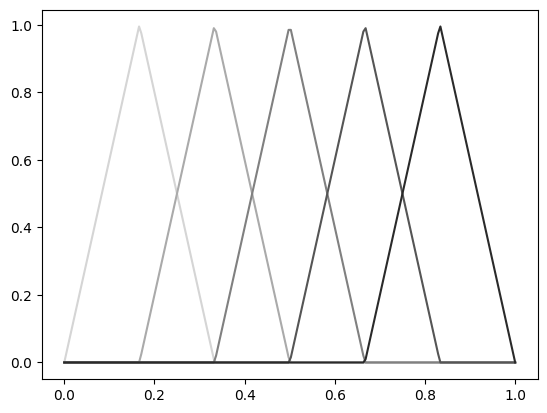

In [7]:
# On les visualise avec un dégradé de gris 

# Nombre de points utilisés pour représenter la fonction
Nx = 200 

x = np.arange(Nx,dtype=float)
y = np.arange(Nx,dtype=float)

for j in range(1,J+1): # j varie entre 1 et J, ne pas se laisser pieger par range()

    s = 0
    
    for t in np.linspace(0.0,1.0,Nx):
        x[s] = t
        y[s] = phi(t,j)
        s = s+1
    
    couleur = 1-j/(J+1)
    
    plt.plot(x,y,color=(couleur,couleur,couleur))

plt.show()

# Exercice V

## Question 1
$$\forall i\in[1,J],\ a(u_h,\phi_i)=l(\phi_i)$$ 
équivaut à $$\forall i\in[1,J],\ a\left(\sum_{j=1}^Ju_h^j\phi_j,\phi_i\right)=l(\phi_i)$$
équivaut à $$\forall i\in[1,J],\ \sum_{j=1}^Ju_h^ja(\phi_j,\phi_i)=l(\phi_i)$$
ce qui équivaut à $$A_hU_h=F_h$$
en notant 
- $A_h$ la matrice $J\times J$ dont les coefficients sont $a(\phi_j,\phi_i)$ à la ligne $i$ et colonne $j$
- $U_h$ le vecteur de $\mathbb{R}^J$ dont les coeffcients sont $u_h^1,\ldots,u_h^J$
- $F_h$ le vecteur de $\mathbb{R}^J$ dont le coefficient à la ligne $i$ est $l(\phi_i)$

## Question 2
Pour calculer $A_h$ on peut :
- soit faire le calcul numérique de $a(\phi_i,\phi_j)$
- soit faire le calcul à la main de $a(\phi_i,\phi_j)$ puis créer la matrice qui correspond.

Il y a donc deux méthodes.

Nous procédons ici par calcul numérique de $a(\varphi_i,\varphi_j)$.
Dans l'exercice VII, on fera le calcul à la main (ou on utilisera le résultat du cours où ce calcul à la main a été fait).

In [8]:
# On défini les dérivées des fonctions chapeau

def phi_prime(x,j):
    if x<(j-1)*h:
        return 0
    elif x<j*h:
        return 1/h
    elif x<(j+1)*h:
        return -1/h
    else: # x>(j+1)*h
        return 0

In [9]:
def phi_prime_phi_prime(x,i,j):
    # Retourne phi_i'(x) * phi_j'(x)
    return phi_prime(x,i)*phi_prime(x,j)

In [10]:
Ah = np.zeros((J,J),float)

In [11]:
Ah

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [15]:
for i in range(J):
    for j in range(J):
        integrale, erreur = quad(phi_prime_phi_prime, 0, 1, args=(i+1,j+1))
        Ah[i,j] = integrale

# Attention les éléments de Ah sont numérotés de 0 à J-1 et les éléments de la base de 1 à J.

In [16]:
Ah

array([[12., -6.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.],
       [ 0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0., -6., 12.]])

## Question 3

On prend $f(x)=12x^2$ et $\alpha=1$, $\beta=2$.

In [17]:
alpha = 1
beta = 2

def f(x):
    return 12*x*x

Calculons $F_h$

In [18]:
def f_times_phi(x,j):
    return f(x)*phi(x,j)